In [ ]:
# http://www.emergentmind.com/neural-network
# https://hmkcode.com/ai/backpropagation-step-by-step/
# https://mattmazur.com/2015/03/17/a-step-by-step-backpropagation-example/

In [ ]:
# Revisa la documentacion de python para poder instalar tenworflow.
# Quizas alguno de las siguientes lineas sean de utilidad, o usa la suite anaconda.
# !conda install tensorflow
# !pip install tensorflow

In [1]:
import numpy as np
import matplotlib.pyplot as plt

X data: (150, 2)
Y data: (150, 2)
L data: (150,)


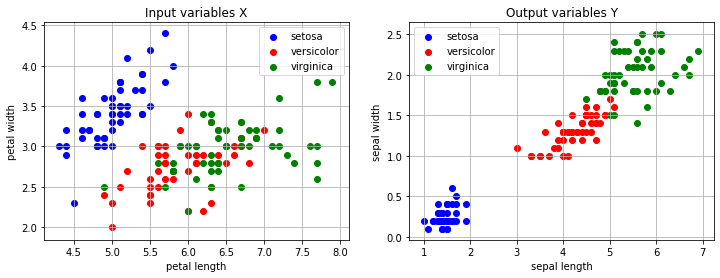

In [2]:
# Load and split data
from sklearn.datasets import load_iris
iris = load_iris()

# We will use length and width of petals as X to predict length and width of sepals as Y
# We also keep the labels in a vector L
X = iris.data[:, :2]
Y = iris.data[:, 2:]
L = iris.target

print("X data:", X.shape)
print("Y data:", Y.shape)
print("L data:", L.shape)

# Plot it
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.scatter(X[L==0, 0], X[L==0, 1], c='b', label='setosa')
plt.scatter(X[L==1, 0], X[L==1, 1], c='r', label='versicolor')
plt.scatter(X[L==2, 0], X[L==2, 1], c='g', label='virginica')
plt.legend()
plt.grid(True)
plt.xlabel('petal length')
plt.ylabel('petal width')
plt.title('Input variables X')
plt.subplot(1, 2, 2)
plt.scatter(Y[L==0, 0], Y[L==0, 1], c='b', label='setosa')
plt.scatter(Y[L==1, 0], Y[L==1, 1], c='r', label='versicolor')
plt.scatter(Y[L==2, 0], Y[L==2, 1], c='g', label='virginica')
plt.legend()
plt.grid(True)
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.title('Output variables Y')
plt.show()

In [3]:
# Create a vector of indices and split it into training and test sets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test, l_train, l_test = train_test_split(X, Y, L, test_size=0.2)

print("Training + validation inputs X:", x_train.shape)
print("Test inputs X:", x_test.shape)
print("Training + validation outputs Y:", y_train.shape)
print("Test outputs Y:", y_test.shape)
print("Training + validation labels l:", l_train.shape)
print("Test labels l:", l_test.shape)

Training + validation inputs X: (120, 2)
Test inputs X: (30, 2)
Training + validation outputs Y: (120, 2)
Test outputs Y: (30, 2)
Training + validation labels l: (120,)
Test labels l: (30,)


In [ ]:
# Documentación de tensorflow y keras
# https://www.tensorflow.org/
# https://keras.io/

In [4]:
# import tensorflow an the classes Model, Input (place-holder layer), and Dense (fully connected layer)
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense

In [5]:
# Create an MLP of two inputs x=[x1, x2], and two outputs y=[y1, y2]
i = Input(shape=(2,), name='input')
o = Dense(units=2, activation=None, name='output')(i)

MLP = Model(inputs=i, outputs=o)
MLP.summary() # print a summary of the MLP model

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           [(None, 2)]               0         
_________________________________________________________________
output (Dense)               (None, 2)                 6         
Total params: 6
Trainable params: 6
Non-trainable params: 0
_________________________________________________________________


In [6]:
# Obtain weights and biases of the hidden layer
w1, b1 = MLP.layers[1].get_weights()
print("Initial weights:", w1.shape)
print(w1)
print("Initial biases", b1.shape)
print(b1)

Initial weights: (2, 2)
[[ 0.7909733  -0.47355413]
 [ 0.09191608 -0.07399392]]
Initial biases (2,)
[0. 0.]


In [7]:
# Plot a diagram of the MLP model
from tensorflow.keras.utils import plot_model
plot_model(MLP, to_file='MLP.png')

Failed to import pydot. You must install pydot and graphviz for `pydotprint` to work.


In [8]:
# Here we define the optimizer and loss function
# Adam and mse in this initial example
MLP.compile(optimizer='adam', loss='mse')

In [9]:
# And now we train the model
# Learn to predict sepal's lenght and width from petal's lenght and width
HISTORY = MLP.fit(x=x_train, y=y_train, batch_size=1, epochs=100, verbose=1, validation_split=0.2)

Train on 96 samples, validate on 24 samples
Epoch 1/100
96/96 [==============================] - 0s 5ms/sample - loss: 8.5098 - val_loss: 7.4708
Epoch 2/100
96/96 [==============================] - 0s 891us/sample - loss: 5.5420 - val_loss: 4.9518
Epoch 3/100
96/96 [==============================] - 0s 875us/sample - loss: 3.7031 - val_loss: 3.3380
Epoch 4/100
96/96 [==============================] - 0s 881us/sample - loss: 2.5584 - val_loss: 2.3871
Epoch 5/100
96/96 [==============================] - 0s 880us/sample - loss: 1.9016 - val_loss: 1.8023
Epoch 6/100
96/96 [==============================] - 0s 854us/sample - loss: 1.5346 - val_loss: 1.4871
Epoch 7/100
96/96 [==============================] - 0s 878us/sample - loss: 1.3490 - val_loss: 1.3335
Epoch 8/100
96/96 [==============================] - 0s 859us/sample - loss: 1.2569 - val_loss: 1.2291
Epoch 9/100
96/96 [==============================] - 0s 868us/sample - loss: 1.2112 - val_loss: 1.1916
Epoch 10/100
96/96 [===========

96/96 [==============================] - 0s 887us/sample - loss: 0.6154 - val_loss: 0.4909
Epoch 80/100
96/96 [==============================] - 0s 881us/sample - loss: 0.6118 - val_loss: 0.4850
Epoch 81/100
96/96 [==============================] - 0s 876us/sample - loss: 0.6071 - val_loss: 0.4808
Epoch 82/100
96/96 [==============================] - 0s 886us/sample - loss: 0.6016 - val_loss: 0.4762
Epoch 83/100
96/96 [==============================] - 0s 859us/sample - loss: 0.5964 - val_loss: 0.4710
Epoch 84/100
96/96 [==============================] - 0s 892us/sample - loss: 0.5934 - val_loss: 0.4656
Epoch 85/100
96/96 [==============================] - 0s 883us/sample - loss: 0.5897 - val_loss: 0.4589
Epoch 86/100
96/96 [==============================] - 0s 874us/sample - loss: 0.5803 - val_loss: 0.4556
Epoch 87/100
96/96 [==============================] - 0s 868us/sample - loss: 0.5761 - val_loss: 0.4514
Epoch 88/100
96/96 [==============================] - 0s 878us/sample - loss:

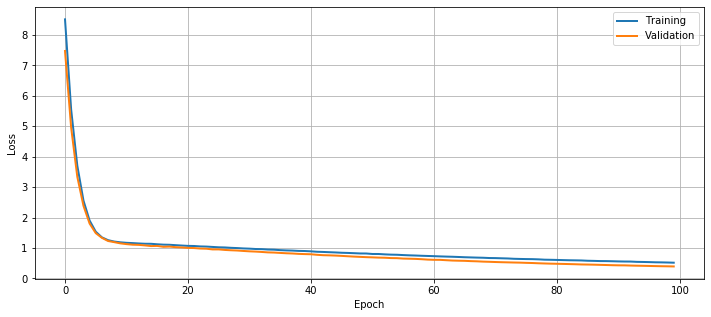

In [10]:
# Plot loss (The object MLP keeps track of the training and validation performance)
plt.figure(figsize=(12, 5))
plt.plot(MLP.history.history['loss'], label='Training', linewidth=2)
plt.plot(MLP.history.history['val_loss'], label='Validation', linewidth=2)
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.show()

In [11]:
# Obtain weights and biases of the hidden layer after training
w1, b1 = MLP.layers[1].get_weights()
print("Initial weights:", w1.shape)
print(w1)
print("Initial biases", b1.shape)
print(b1)

Initial weights: (2, 2)
[[ 1.1803046   0.3672094 ]
 [-0.87373906 -0.34080756]]
Initial biases (2,)
[-0.43881196  0.11905862]


In [12]:
# Use the trained model to compute the average test loss
MLP.evaluate(x=x_test, y=y_test, verbose=False)

0.44478023052215576

In [13]:
# Now generate the predictions on the test set
y_test_hat = MLP.predict(x=x_test)
print(y_test_hat.shape)

(30, 2)


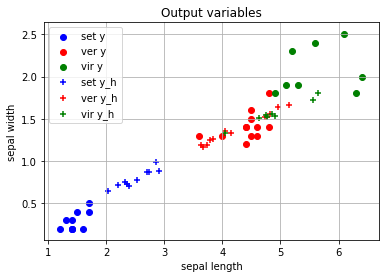

In [14]:
# Plot y_test_hat
plt.scatter(y_test[l_test==0, 0], y_test[l_test==0, 1], c='b', label='set y')
plt.scatter(y_test[l_test==1, 0], y_test[l_test==1, 1], c='r', label='ver y')
plt.scatter(y_test[l_test==2, 0], y_test[l_test==2, 1], c='g', label='vir y')

plt.scatter(y_test_hat[l_test==0, 0], y_test_hat[l_test==0, 1], c='b', marker='+', label='set y_h')
plt.scatter(y_test_hat[l_test==1, 0], y_test_hat[l_test==1, 1], c='r', marker='+', label='ver y_h')
plt.scatter(y_test_hat[l_test==2, 0], y_test_hat[l_test==2, 1], c='g', marker='+', label='vir y_h')

plt.legend()
plt.grid(True)
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.title('Output variables')
plt.show()

In [15]:
# Create a larger MLP
i = Input(shape=(2,), name='input')
h = Dense(units=32, activation='relu', name='hidden1')(i)
h = Dense(units=16, activation='relu', name='hidden2')(h)
h = Dense(units=8, activation='relu', name='hidden3')(h)
o = Dense(units=2, activation=None, name='output')(h)

MLP = Model(inputs=i, outputs=o)
MLP.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           [(None, 2)]               0         
_________________________________________________________________
hidden1 (Dense)              (None, 32)                96        
_________________________________________________________________
hidden2 (Dense)              (None, 16)                528       
_________________________________________________________________
hidden3 (Dense)              (None, 8)                 136       
_________________________________________________________________
output (Dense)               (None, 2)                 18        
Total params: 778
Trainable params: 778
Non-trainable params: 0
_________________________________________________________________


In [16]:
# Compile it
MLP.compile(optimizer='adam', loss='mse')

In [17]:
# Train it
MLP.fit(x=x_train, y=y_train, batch_size=1, epochs=100, verbose=1, validation_split=0.2)

Train on 96 samples, validate on 24 samples
Epoch 1/100
96/96 [==============================] - 0s 5ms/sample - loss: 9.3770 - val_loss: 10.9709
Epoch 2/100
96/96 [==============================] - 0s 1ms/sample - loss: 8.5936 - val_loss: 10.5459
Epoch 3/100
96/96 [==============================] - 0s 1ms/sample - loss: 8.2230 - val_loss: 10.1456
Epoch 4/100
96/96 [==============================] - 0s 1ms/sample - loss: 7.8711 - val_loss: 9.7639
Epoch 5/100
96/96 [==============================] - 0s 1ms/sample - loss: 7.5392 - val_loss: 9.3927
Epoch 6/100
96/96 [==============================] - 0s 1ms/sample - loss: 7.2247 - val_loss: 9.0442
Epoch 7/100
96/96 [==============================] - 0s 996us/sample - loss: 6.9258 - val_loss: 8.7177
Epoch 8/100
96/96 [==============================] - 0s 1ms/sample - loss: 6.6413 - val_loss: 8.4036
Epoch 9/100
96/96 [==============================] - 0s 1ms/sample - loss: 6.3737 - val_loss: 8.0963
Epoch 10/100
96/96 [======================

Epoch 81/100
96/96 [==============================] - 0s 1ms/sample - loss: 1.7767 - val_loss: 2.3181
Epoch 82/100
96/96 [==============================] - 0s 1ms/sample - loss: 1.7745 - val_loss: 2.3137
Epoch 83/100
96/96 [==============================] - 0s 1ms/sample - loss: 1.7734 - val_loss: 2.3094
Epoch 84/100
96/96 [==============================] - 0s 1ms/sample - loss: 1.7724 - val_loss: 2.3055
Epoch 85/100
96/96 [==============================] - 0s 1ms/sample - loss: 1.7716 - val_loss: 2.3020
Epoch 86/100
96/96 [==============================] - 0s 1ms/sample - loss: 1.7714 - val_loss: 2.2996
Epoch 87/100
96/96 [==============================] - 0s 1ms/sample - loss: 1.7719 - val_loss: 2.2944
Epoch 88/100
96/96 [==============================] - 0s 1ms/sample - loss: 1.7708 - val_loss: 2.2940
Epoch 89/100
96/96 [==============================] - 0s 1ms/sample - loss: 1.7702 - val_loss: 2.2922
Epoch 90/100
96/96 [==============================] - 0s 1ms/sample - loss: 1.7693

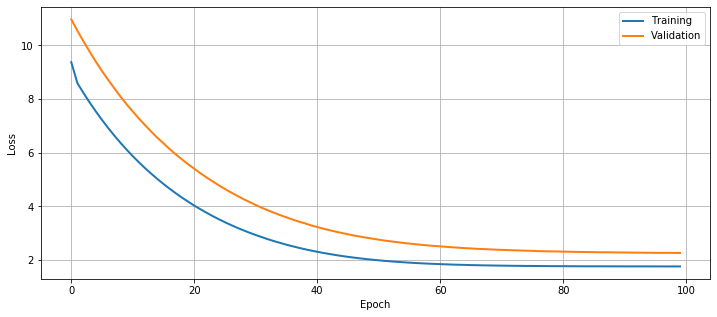

In [18]:
# Plot loss (The object MLP keeps track of the training and validation performance)
plt.figure(figsize=(12, 5))
plt.plot(MLP.history.history['loss'], label='Training', linewidth=2)
plt.plot(MLP.history.history['val_loss'], label='Validation', linewidth=2)
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.show()

In [19]:
# Obtain weights and biases of the hidden layer
for layer in MLP.layers[1:]:
  w, b = layer.get_weights()
  print("Weights: ", w.shape, end='\t')
  #print(w)
  print("Biases:  ", b.shape)
  #print(b)

Weights:  (2, 32)	Biases:   (32,)
Weights:  (32, 16)	Biases:   (16,)
Weights:  (16, 8)	Biases:   (8,)
Weights:  (8, 2)	Biases:   (2,)


In [20]:
# Use the trained model to compute the average test loss
MLP.evaluate(x=x_test, y=y_test, verbose=False)

1.7657519578933716

In [21]:
# Now generate the predictions on the test set
y_test_hat = MLP.predict(x=x_test)
print(y_test_hat.shape)

(30, 2)


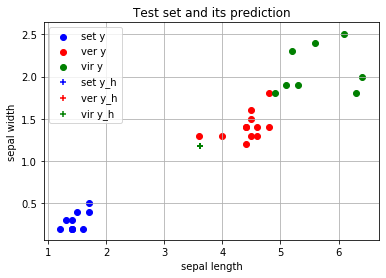

In [22]:
# Plot y_test_hat
plt.scatter(y_test[l_test==0, 0], y_test[l_test==0, 1], c='b', label='set y')
plt.scatter(y_test[l_test==1, 0], y_test[l_test==1, 1], c='r', label='ver y')
plt.scatter(y_test[l_test==2, 0], y_test[l_test==2, 1], c='g', label='vir y')

plt.scatter(y_test_hat[l_test==0, 0], y_test_hat[l_test==0, 1], c='b', marker='+', label='set y_h')
plt.scatter(y_test_hat[l_test==1, 0], y_test_hat[l_test==1, 1], c='r', marker='+', label='ver y_h')
plt.scatter(y_test_hat[l_test==2, 0], y_test_hat[l_test==2, 1], c='g', marker='+', label='vir y_h')

plt.legend()
plt.grid(True)
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.title('Test set and its prediction')
plt.show()

In [23]:
# Auxiliar function to create an MLP
def create_MLP(n_units=[2, 1], activations=None, last_activation=None):
  h = i = Input(shape=(n_units[0]))
  for units in n_units[1:-1]:
    h = Dense(units=units, activation=activations)(h)
  o = Dense(units=n_units[-1], activation=last_activation)(h)
  return Model(inputs=i, outputs=o)

In [24]:
# Corre el experimento 100 veces y registra el desempeño promedio y el tiempo de ejecución
loss = np.zeros((10, 2))
for ind in range(10):
  MLP = create_MLP([2, 32, 16, 8, 2], activations='relu', last_activation='relu')
  MLP.compile(optimizer='adam', loss='mse')
  MLP.fit(x=x_train, y=y_train, batch_size=1, epochs=100, verbose=0, validation_split=0.2)
  loss[ind, 0] = MLP.evaluate(x=x_train, y=y_train, verbose=False)
  loss[ind, 1] = MLP.evaluate(x=x_test, y=y_test, verbose=False)
  print(f"Run {ind+1:3d} -- ", end='')
  print(f"Train loss: {loss[ind, 0]:6.4f}", end='; ')
  print(f"Test loss: {loss[ind, 1]:6.4f}")

print("Average -- ", end='')
print(f" train loss: {loss[:, 0].mean():6.4f} +- {loss[:, 0].std():6.4f}", end='; ')
print(f" test loss: {loss[:, 1].mean():6.4f} +- {loss[:, 1].std():6.4f}")

Run   1 -- Train loss: 0.1805; Test loss: 0.2163
Run   2 -- Train loss: 0.1657; Test loss: 0.2180
Run   3 -- Train loss: 9.6370; Test loss: 9.5360
Run   4 -- Train loss: 0.1287; Test loss: 0.2153
Run   5 -- Train loss: 9.6370; Test loss: 9.5360
Run   6 -- Train loss: 0.1293; Test loss: 0.2050
Run   7 -- Train loss: 9.6370; Test loss: 9.5360
Run   8 -- Train loss: 0.1589; Test loss: 0.2824
Run   9 -- Train loss: 0.1237; Test loss: 0.1825
Run  10 -- Train loss: 0.1368; Test loss: 0.1959
Average --  train loss: 2.9935 +- 4.3493;  test loss: 3.0123 +- 4.2708
